In [1]:
import ossify as osy

# Quickstart

What does ossify do and why is it useful?

Ossify is a library to work with neuronal morphology, with a focus high resolution synaptic level reconstructions.
Importantly, it solves the challenge of working with objects that have multiple representations, such as meshes and skeletons, and allows users to easily convert between them.
In addition, it provides tools to load, manipulate, visualize, and analyze neuron morphologies.

## Installation
Ossify can be installed via pip:

```bash
pip install ossify
```

(But you should really probably be using `uv`, in which case `uv add ossify` to your project!)

## Basic Usage

Cable length: 11043212.0 nm
Number of presynaptic sites across cell: 902


Cable length in dendrite only: 2848269.0 nm
Number of presynaptic sites in dendrite only: 21


/Users/caseysm/Work/Code/ossify/src/ossify/plot.py:355: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


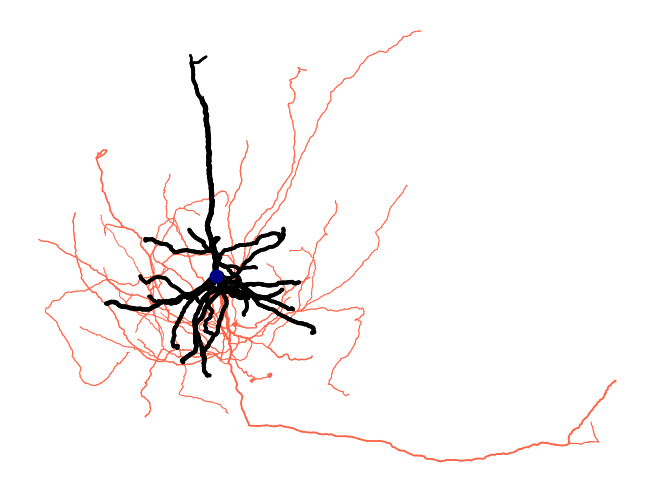

In [ ]:
# Load a cell from a file or cloudpath
cell = osy.load_cell('https://github.com/ceesem/ossify/raw/refs/heads/main/864691135336055529.osy')

print("Cable length:", cell.skeleton.cable_length(), "nm")
print("Number of presynaptic sites across cell:", len(cell.annotations.pre_syn))

# Map data from one representation to another:
volume = cell.graph.map_features_to_layer("size_nm3", layer='skeleton', agg='sum')
cell.skeleton.add_feature(volume)

# Apply object-wide filters based on vertex features
print('\n')
with cell.skeleton.mask_context(cell.skeleton.features['compartment'] == 3) as masked_cell:
    print("Cable length in dendrite only:", masked_cell.skeleton.cable_length(), "nm")
    print("Number of presynaptic sites in dendrite only:", len(masked_cell.annotations.pre_syn))
    
# Apply algorithmic metrics and attach new data features
strahler_number = osy.algorithms.strahler_number(cell)
cell.skeleton.add_feature(strahler_number, 'strahler_number')

# plot the cell with some features
fig = osy.plot.plot_cell_2d(
    cell,
    color='compartment',
    palette={1: 'navy', 2: 'tomato', 3: 'black'},
    linewidth='radius',
    linewidth_norm=(100, 500),
    widths=(0.5, 5),
    root_marker=True,
    units_per_inch=100_000,
)
